In [3]:
import pandas as pd

In [5]:
import numpy as np

In [7]:
import matplotlib.pyplot as plt

In [8]:
import seaborn as sns

In [10]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

""" About the dataset¶
Each restaurant in the dataset is uniquely identified by its Restaurant Id. Every Restaurant contains the following variables:

Restaurant Id: Unique id of every restaurant across various cities of the world.
Restaurant Name: Name of the restaurant.
Country Code: Country in which restaurant is located.
City: City in which restaurant is located.
Address: Address of the restaurant.
Locality: Location in the city.
Locality Verbose: Detailed description of the locality.
Longitude: Longitude coordinate of the restaurant's location.
Latitude: Latitude coordinate of the restaurant's location.
Cuisines: Cuisines offered by the restaurant.
Average Cost for two: Cost for two people in different currencies. 👫
Currency: Currency of the country.
Has Table booking: yes/no.
Has Online delivery: yes/ no.
Is delivering: yes/ no.
Switch to order menu: yes/no.
Price range: Range of price of food.
Aggregate Rating: Average rating out of 5
Rating color: depending upon the average rating color
Rating text: text on the basis of rating of rating
Votes: Number of ratings casted by peopletings casted by people """

## Uploading dataset

In [15]:
df = pd.read_csv("C:\\Users\\Admin\\Desktop\\DataSets\\zomato.csv", encoding='latin-1')

In [17]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [19]:
df_orignal = df.copy()

In [21]:
df.shape

(9551, 21)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [25]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [27]:
z=df.isnull().sum()[df.isnull().sum()>0].to_frame().rename(columns={0:'Missing Values'})
z['% of missing values'] = z['Missing Values']/df.shape[0]*10
z

,Missing Values,% of missing values
Cuisines,9,0.009423


# 9 missing values in Cuisines features
# fill the null values with default values

In [33]:
df[df['Cuisines'].isnull()]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
84,17284105,Cookie Shoppe,216,Albany,"115 N Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.154000,31.577200,NaN,...,Dollar($),No,No,No,No,1,3.4,Orange,Average,34
87,17284211,Pearly's Famous Country Cookng,216,Albany,"814 N Slappey Blvd, Albany, GA 31701",Albany,"Albany, Albany",-84.175900,31.588200,NaN,...,Dollar($),No,No,No,No,1,3.4,Orange,Average,36
94,17284158,Jimmie's Hot Dogs,216,Albany,"204 S Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.153400,31.575100,NaN,...,Dollar($),No,No,No,No,1,3.9,Yellow,Good,160
297,17374552,Corkscrew Cafe,216,Gainesville,"51 W Main St, Dahlonega, GA 30533",Dahlonega,"Dahlonega, Gainesville",-83.985800,34.531800,NaN,...,Dollar($),No,No,No,No,3,3.9,Yellow,Good,209
328,17501439,Dovetail,216,Macon,"543 Cherry St, Macon, GA 31201",Macon,"Macon, Macon",-83.627979,32.836410,NaN,...,Dollar($),No,No,No,No,3,3.8,Yellow,Good,102
346,17606621,HI Lite Bar & Lounge,216,Miller,"109 N Broadway Ave, Miller, SD 57362",Miller,"Miller, Miller",-98.989100,44.515800,NaN,...,Dollar($),No,No,No,No,1,3.4,Orange,Average,11
368,17059060,Hillstone,216,Orlando,"215 South Orlando Avenue, Winter Park, FL 32789",Winter Park,"Winter Park, Orlando",-81.365260,28.596682,NaN,...,Dollar($),No,No,No,No,3,4.4,Green,Very Good,1158
418,17142698,Leonard's Bakery,216,Rest of Hawaii,"933 Kapahulu Ave, Honolulu, HI 96816",Kaimuki,"Kaimuki, Rest of Hawaii",-157.813432,21.284586,NaN,...,Dollar($),No,No,No,No,1,4.7,Dark Green,Excellent,707
455,17616465,Tybee Island Social Club,216,Savannah,"1311 Butler Ave, Tybee Island, GA 31328",Tybee Island,"Tybee Island, Savannah",-80.848297,31.995810,NaN,...,Dollar($),No,No,No,No,1,3.9,Yellow,Good,309


In [35]:
df['Cuisines'] = df['Cuisines'].fillna('Unknown')
print(df['Cuisines'].isnull().sum())

0


In [37]:
df.duplicated().sum()

0

In [39]:
df_country = pd.read_excel("C:\\Users\\Admin\\Desktop\\DataSets\\Country-Code.xlsx")

In [41]:
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


# merging both the datasets

In [44]:
final_df = pd.merge(df, df_country, on="Country Code", how= 'left')

In [46]:
final_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [48]:
print(df['Has Table booking'].value_counts())
print(df['Has Online delivery'].value_counts())
print(df['Is delivering now'].value_counts())
print(df['Switch to order menu'].value_counts())

Has Table booking
No     8393
Yes    1158
Name: count, dtype: int64
Has Online delivery
No     7100
Yes    2451
Name: count, dtype: int64
Is delivering now
No     9517
Yes      34
Name: count, dtype: int64
Switch to order menu
No    9551
Name: count, dtype: int64


In [50]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [52]:
drop_cols = ['Restaurant ID', 'Country Code', 'Switch to order menu', 'Address', 'Locality Verbose', 'Longitude', 'Latitude']
df = df.drop(columns=drop_cols)

In [54]:
df.head()

,Restaurant Name,City,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes
0,Le Petit Souffle,Makati City,"Century City Mall, Poblacion, Makati City","French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,3,4.8,Dark Green,Excellent,314
1,Izakaya Kikufuji,Makati City,"Little Tokyo, Legaspi Village, Makati City",Japanese,1200,Botswana Pula(P),Yes,No,No,3,4.5,Dark Green,Excellent,591
2,Heat - Edsa Shangri-La,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City","Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,4,4.4,Green,Very Good,270
3,Ooma,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Sushi",1500,Botswana Pula(P),No,No,No,4,4.9,Dark Green,Excellent,365
4,Sambo Kojin,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,4,4.8,Dark Green,Excellent,229


In [56]:
df.shape

(9551, 14)

In [58]:
no_of_rest = final_df.Country.value_counts()

In [60]:
no_of_rest

Country
India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: count, dtype: int64

In [62]:
country_names = final_df.Country.value_counts().index
country_names

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'UAE',
       'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada'],
      dtype='object', name='Country')

In [64]:
country_names[:3]

Index(['India', 'United States', 'United Kingdom'], dtype='object', name='Country')

In [66]:
country_val=final_df.Country.value_counts().values
country_val

array([8652,  434,   80,   60,   60,   60,   40,   34,   24,   22,   21,
         20,   20,   20,    4], dtype=int64)

([<matplotlib.patches.Wedge at 0x1bc9059b500>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.392%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.735%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.873%')])

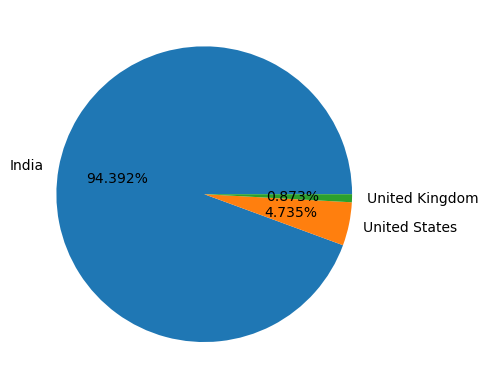

In [68]:
plt.pie(country_val[:3], labels=country_names[:3], autopct='%1.3f%%')

In [70]:
rest_in_city=final_df.City.value_counts()
rest_in_city

City
New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: count, Length: 141, dtype: int64

In [72]:
city_names=final_df.City.value_counts().index
city_names

Index(['New Delhi', 'Gurgaon', 'Noida', 'Faridabad', 'Ghaziabad',
       'Bhubaneshwar', 'Amritsar', 'Ahmedabad', 'Lucknow', 'Guwahati',
       ...
       'Ojo Caliente', 'Montville', 'Monroe', 'Miller', 'Middleton Beach',
       'Panchkula', 'Mc Millan', 'Mayfield', 'Macedon', 'Vineland Station'],
      dtype='object', name='City', length=141)

In [74]:
city_val=final_df.City.value_counts().values
city_val

array([5473, 1118, 1080,  251,   25,   21,   21,   21,   21,   21,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         18,   18,   16,   14,   11,    6,    4,    4,    3,    3,    2,
          2,    2,    2,    2,    2,    2,    2,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1], dtype=int64)

([<matplotlib.patches.Wedge at 0x1bc919e9cd0>,
 [Text(-0.6145352824185932, 0.9123301960708633, 'New Delhi'),
  Text(0.0623675251198054, -1.0982305276263407, 'Gurgaon'),
  Text(0.8789045225625368, -0.6614581167535246, 'Noida'),
  Text(1.0922218418223437, -0.13058119407559224, 'Faridabad'),
  Text(1.099946280005612, -0.010871113182029924, 'Ghaziabad')],
 [Text(-0.3352010631374145, 0.497634652402289, '68.869%'),
  Text(0.0340186500653484, -0.5990348332507311, '14.068%'),
  Text(0.47940246685229276, -0.36079533641101336, '13.590%'),
  Text(0.5957573682667329, -0.07122610585941394, '3.158%'),
  Text(0.5999706981848791, -0.005929698099289049, '0.315%')])

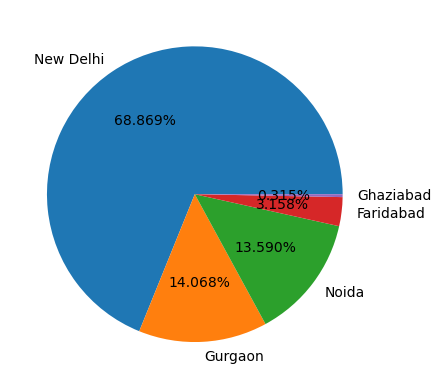

In [76]:
plt.pie(city_val[:5],labels=city_names[:5],autopct='%1.3f%%')

In [78]:
s=final_df[final_df['Country']=='India'].groupby('City').size().reset_index()
s

,City,0
0,Agra,20
1,Ahmedabad,21
2,Allahabad,20
3,Amritsar,21
4,Aurangabad,20
5,Bangalore,20
6,Bhopal,20
7,Bhubaneshwar,21
8,Chandigarh,18
9,Chennai,20


# Gurgaon has 1118 most restaurants and New Delhi has 5473 and Noida has 1080. These are the cities with most restaurants

In [81]:
final_df[['Country','Currency']].groupby(['Country','Currency']).size().reset_index()

,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


In [83]:
final_df[final_df['Has Online delivery'] =="Yes"].Country.value_counts()

Country
India    2423
UAE        28
Name: count, dtype: int64

In [85]:
final_df[final_df['Has Table booking']=='Yes'].Country.value_counts()

Country
India             1111
UAE                 18
Phillipines         14
United Kingdom      12
South Africa         2
Qatar                1
Name: count, dtype: int64

In [87]:
final_df[final_df['Has Table booking']=='Yes'].City.value_counts()

City
New Delhi           715
Gurgaon             204
Noida               112
Faridabad            15
Chennai              13
Pune                 13
Dubai                12
Hyderabad            10
Kolkata               9
Mumbai                9
Abu Dhabi             6
Bangalore             6
London                6
Taguig City           3
Ghaziabad             3
Pasay City            3
Secunderabad          2
Edinburgh             2
Birmingham            2
Manchester            2
Makati City           2
Mandaluyong City      2
Pasig City            2
Tagaytay City         1
San Juan City         1
Doha                  1
Cape Town             1
Johannesburg          1
Name: count, dtype: int64

In [89]:
ratings=final_df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Counts'})
ratings

,Aggregate rating,Rating color,Rating text,Rating Counts
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


<Axes: xlabel='Aggregate rating', ylabel='Rating Counts'>

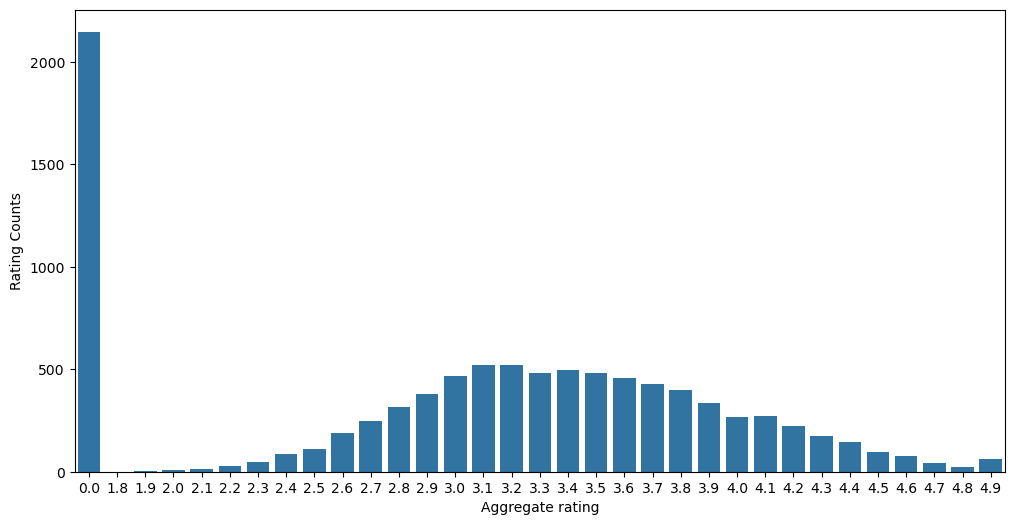

In [91]:
plt.rcParams['figure.figsize'] = (12, 6)
sns.barplot(x="Aggregate rating",y="Rating Counts",data=ratings)


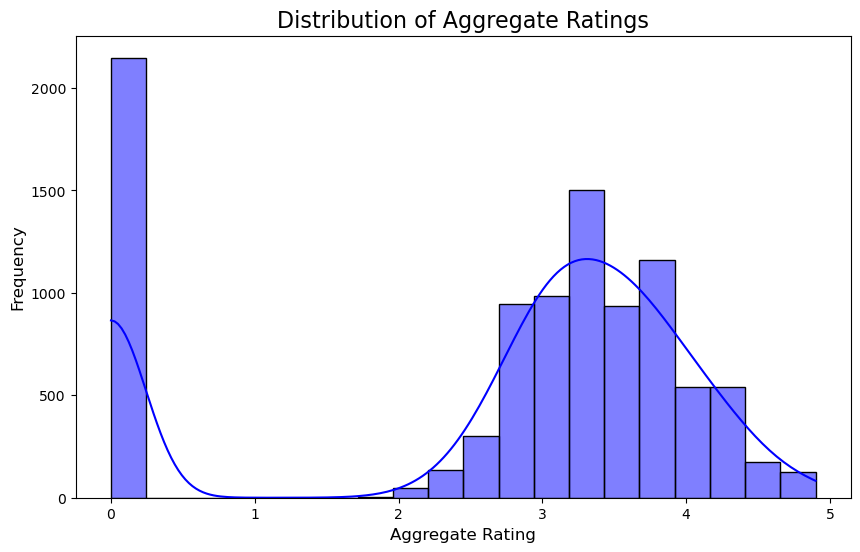

In [93]:
plt.figure(figsize=(10, 6))
sns.histplot(final_df['Aggregate rating'], bins=20, kde=True, color='blue')
plt.title('Distribution of Aggregate Ratings', fontsize=16)
plt.xlabel('Aggregate Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

In [95]:
final_df['Aggregate rating'].describe()

count    9551.000000
mean        2.666370
std         1.516378
min         0.000000
25%         2.500000
50%         3.200000
75%         3.700000
max         4.900000
Name: Aggregate rating, dtype: float64

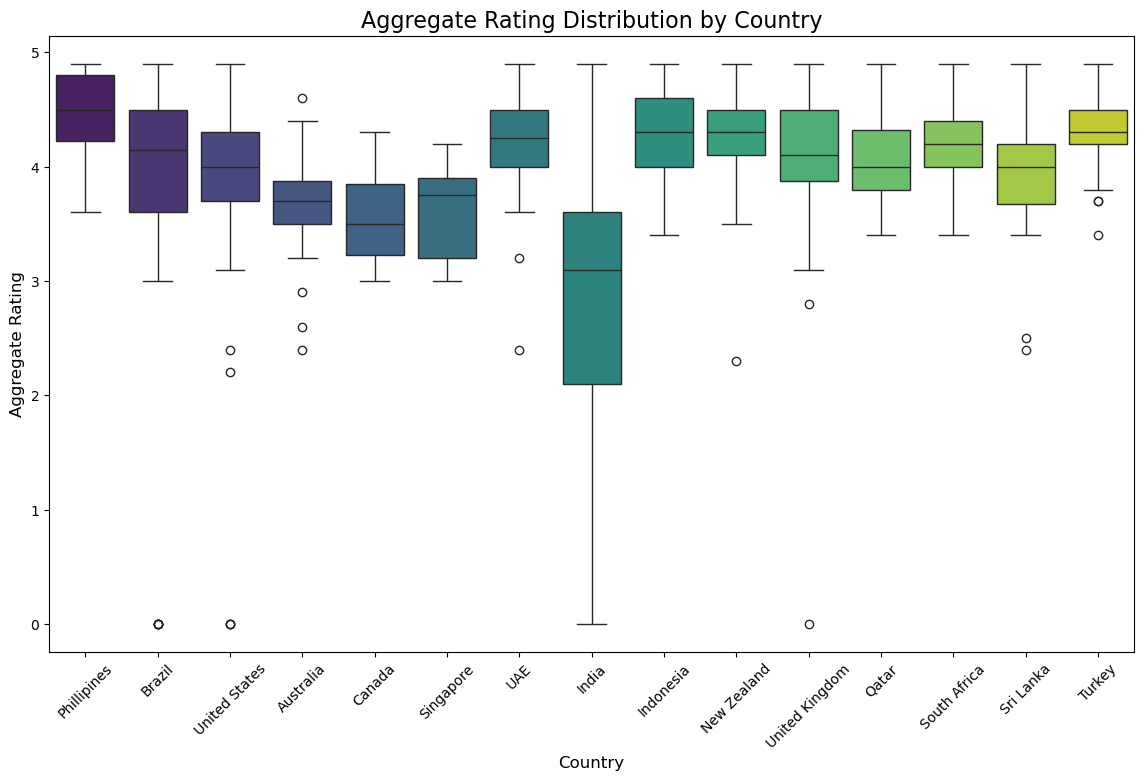

In [97]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=final_df, x='Country', y='Aggregate rating', palette='viridis')
plt.xticks(rotation=45)
plt.title('Aggregate Rating Distribution by Country', fontsize=16)
plt.ylabel('Aggregate Rating', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.show()

# Top 10 cities with most restaurants

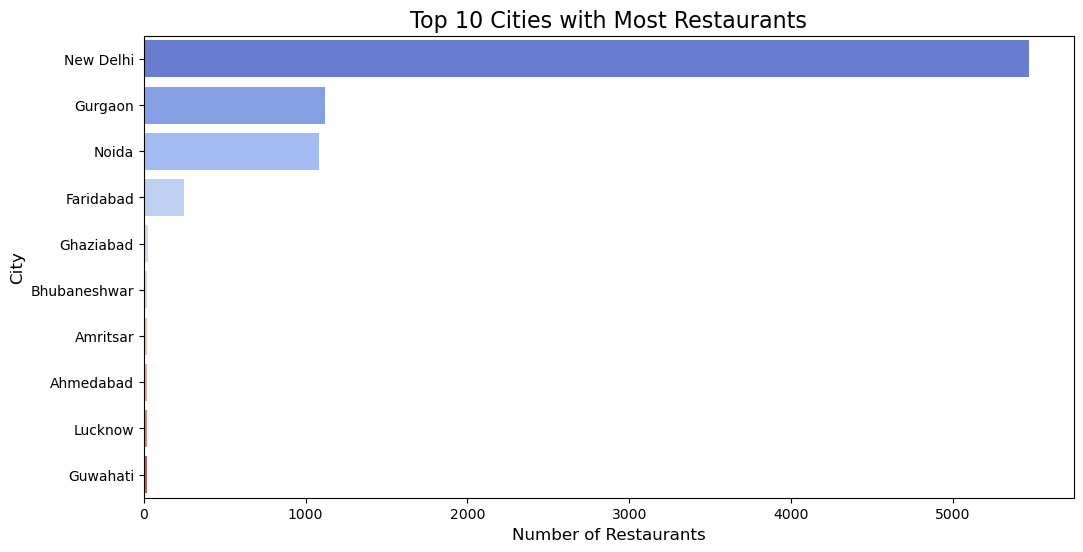

In [100]:
top_cities = final_df['City'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette='coolwarm')
plt.title('Top 10 Cities with Most Restaurants', fontsize=16)
plt.xlabel('Number of Restaurants', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.show()

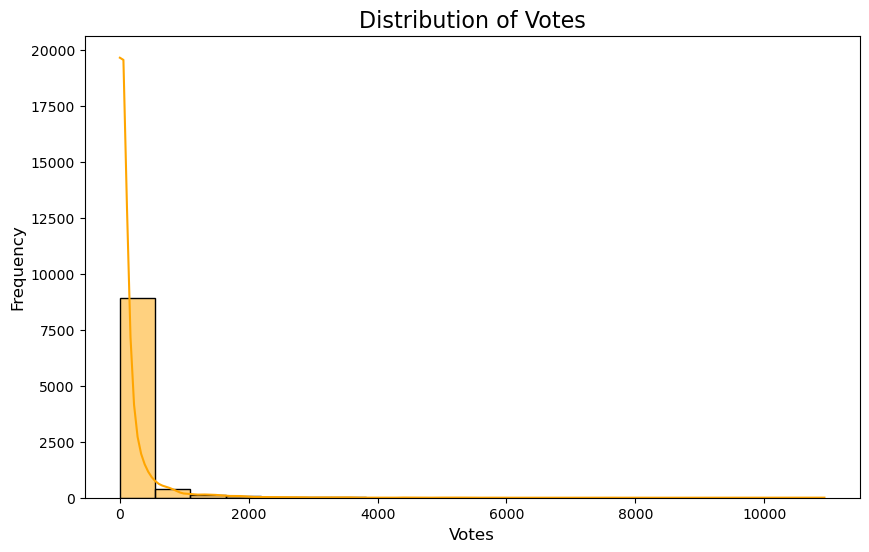

In [102]:
plt.figure(figsize=(10, 6))
sns.histplot(final_df['Votes'],bins=20,kde=True, color='orange')
plt.title('Distribution of Votes', fontsize=16)
plt.xlabel('Votes', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

In [104]:
final_df['Votes'].describe()

count     9551.000000
mean       156.909748
std        430.169145
min          0.000000
25%          5.000000
50%         31.000000
75%        131.000000
max      10934.000000
Name: Votes, dtype: float64

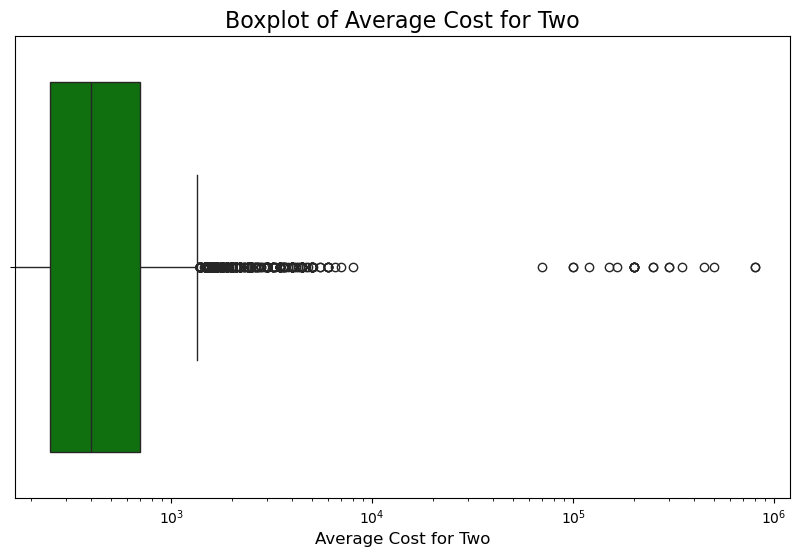

In [106]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=final_df['Average Cost for two'], color='green')
plt.title('Boxplot of Average Cost for Two', fontsize=16)
plt.xlabel('Average Cost for Two', fontsize=12)
plt.xscale('log')  # Log scale due to extreme values
plt.show()

In [108]:
final_df['Average Cost for two'].describe()

count      9551.000000
mean       1199.210763
std       16121.183073
min           0.000000
25%         250.000000
50%         400.000000
75%         700.000000
max      800000.000000
Name: Average Cost for two, dtype: float64

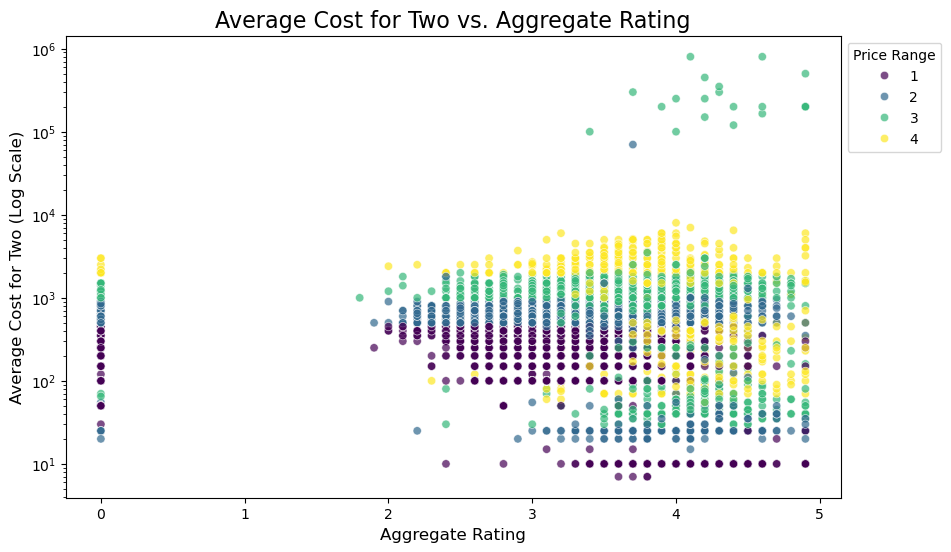

In [110]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_df, x='Aggregate rating', y='Average Cost for two', hue='Price range', palette='viridis', alpha=0.7)
plt.yscale('log')  # Log scale is used for better to better visualize cost distribution due to extreme values
plt.title('Average Cost for Two vs. Aggregate Rating', fontsize=16)
plt.xlabel('Aggregate Rating', fontsize=12)
plt.ylabel('Average Cost for Two (Log Scale)', fontsize=12)
plt.legend(title='Price Range', bbox_to_anchor=(1, 1))
plt.show()

In [112]:
!pip install wordcloud
from wordcloud import WordCloud

   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.2 kB ? eta -:--:--
   ------- ------------------------------- 61.4/301.2 kB 656.4 kB/s eta 0:00:01
   ---------------------------------------- 301.2/301.2 kB 2.7 MB/s eta 0:00:00


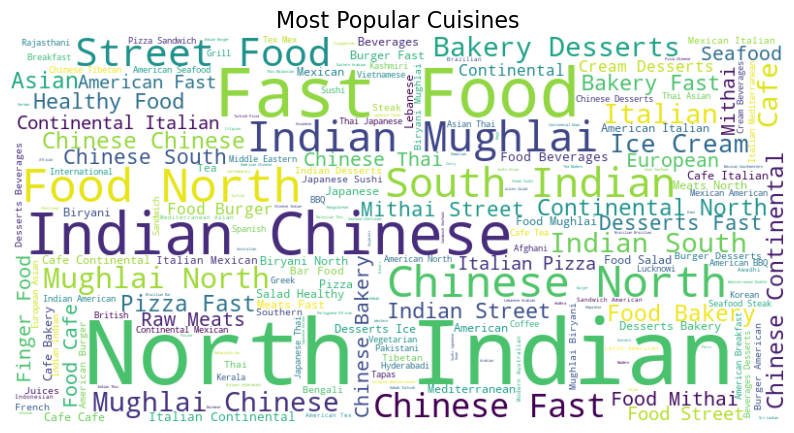

In [114]:
cuisine_text = ' '.join(final_df['Cuisines'].dropna().values)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cuisine_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Popular Cuisines', fontsize=16)
plt.show()

# Extract Cuisines data for analysis

In [117]:
cuisine_data = final_df[['Cuisines', 'Country', 'Aggregate rating', 'Price range']]
cuisine_data.head()

,Cuisines,Country,Aggregate rating,Price range
0,"French, Japanese, Desserts",Phillipines,4.8,3
1,Japanese,Phillipines,4.5,3
2,"Seafood, Asian, Filipino, Indian",Phillipines,4.4,4
3,"Japanese, Sushi",Phillipines,4.9,4
4,"Japanese, Korean",Phillipines,4.8,4


In [119]:
cuisine_data_expanded = (
    cuisine_data.assign(Cuisines=cuisine_data['Cuisines'].str.split(', '))
    .explode('Cuisines')
    .reset_index(drop=True)
)

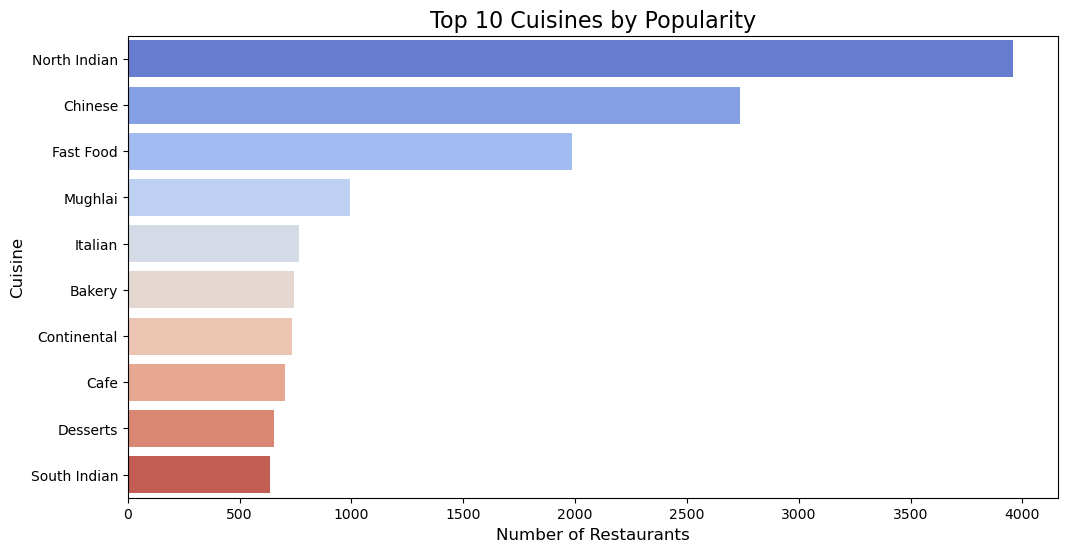

In [121]:
# top 10 cuisines

top_cuisines = cuisine_data_expanded['Cuisines'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette='coolwarm')
plt.title('Top 10 Cuisines by Popularity', fontsize=16)
plt.xlabel('Number of Restaurants', fontsize=12)
plt.ylabel('Cuisine', fontsize=12)
plt.show()

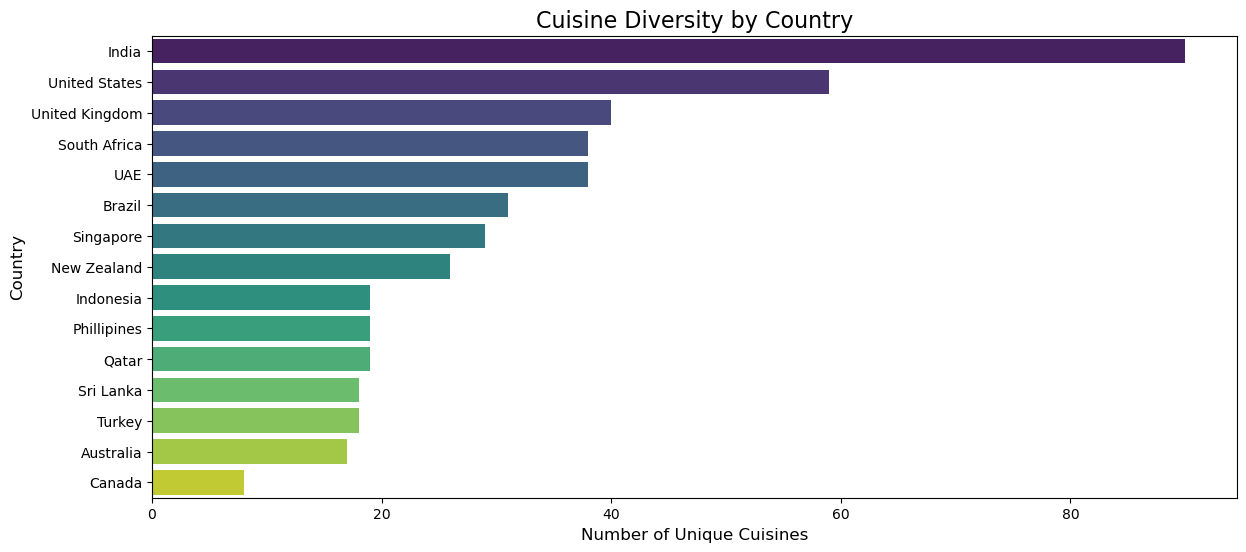

In [123]:
# cuisines diversity by country
cuisine_country = cuisine_data_expanded.groupby('Country')['Cuisines'].nunique().sort_values(ascending=False)
plt.figure(figsize=(14, 6))
sns.barplot(x=cuisine_country.values, y=cuisine_country.index, palette='viridis')
plt.title('Cuisine Diversity by Country', fontsize=16)
plt.xlabel('Number of Unique Cuisines', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.show()

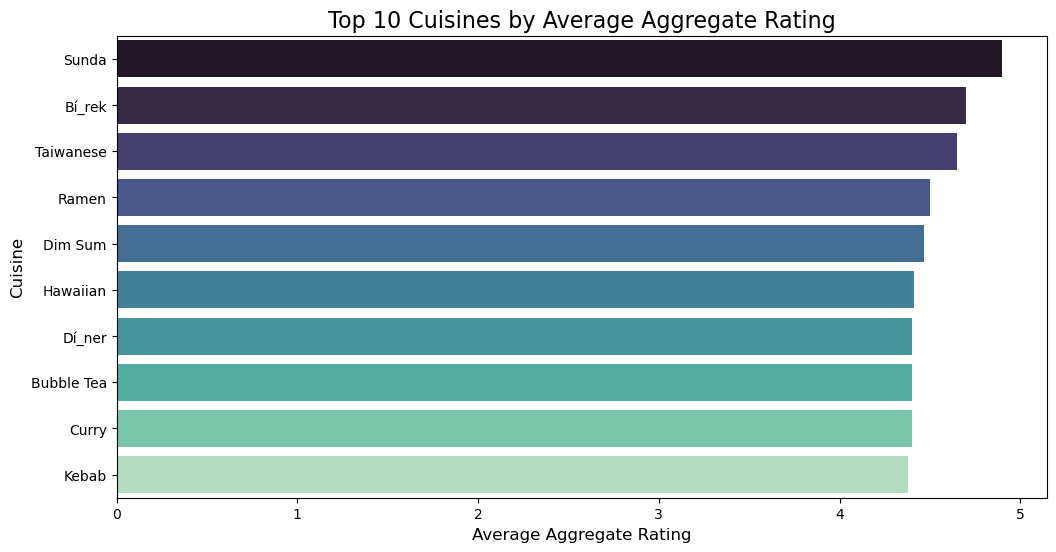

In [125]:
# cuisines with highest avg aggrigate ratings
cuisine_rating = cuisine_data_expanded.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=cuisine_rating.values, y=cuisine_rating.index, palette='mako')
plt.title('Top 10 Cuisines by Average Aggregate Rating', fontsize=16)
plt.xlabel('Average Aggregate Rating', fontsize=12)
plt.ylabel('Cuisine', fontsize=12)
plt.show()

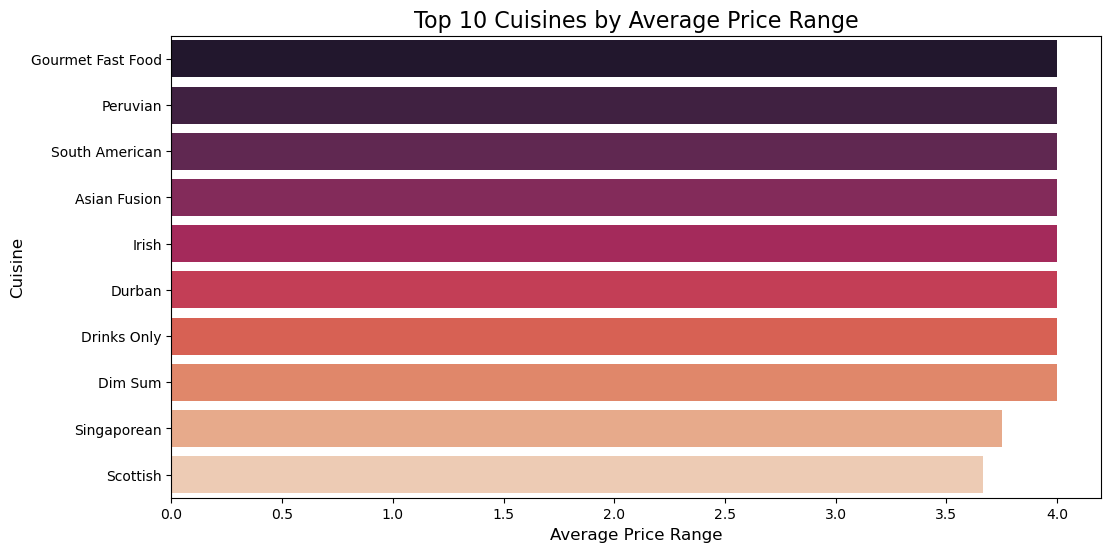

In [127]:
cuisine_price = cuisine_data_expanded.groupby('Cuisines')['Price range'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=cuisine_price.values, y=cuisine_price.index, palette='rocket')
plt.title('Top 10 Cuisines by Average Price Range', fontsize=16)
plt.xlabel('Average Price Range', fontsize=12)
plt.ylabel('Cuisine', fontsize=12)
plt.show()

<Axes: xlabel='Rating color', ylabel='count'>

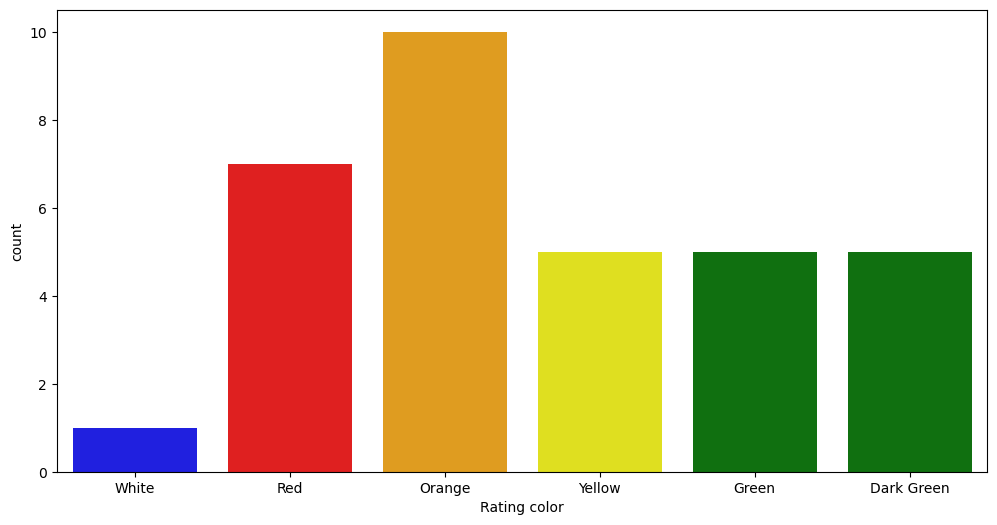

In [129]:
sns.countplot(x="Rating color",data=ratings,palette=['blue','red','orange','yellow','green','green'])

# Recommendations for Increasing Sales Based on Analysis
""" Focus on Popular Cuisines:
Invest in restaurants offering top cuisines like North Indian, Chinese, and Fast Food, as they dominate customer preferences.
Expand the presence of niche but high-rating cuisines to attract premium customers.
Optimize Pricing Strategy:
Offer value-for-money options in Fast Food and Bakery, which are widely consumed at lower price points.
For high-priced cuisines (e.g., French, European), focus on premium experiences such as ambiance and service to justify the cost.
Improve Ratings through Quality and Customer Engagement:
Focus on consistent food quality, service, and customer feedback for better ratings
Encourage diners to leave reviews and ratings, especially in underperforming regions or cuisines.
Strategies:
In countries with high ratings but fewer restaurants, expand operations
For cities with high restaurant counts but lower ratings, prioritize customer retention through discounts and promotions.
Marketing:
Highlight top-rated cuisines and locations in marketing materials.
These are some strategies for increasing sales that can be used! """